# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [5]:
# Write your code here
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
import pandas as pd


# Read the CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

reviews_array = []

# Tokenizing each review and filtering out empty lists
for review in data['cleaned_text']:
    reviews_array.append(word_tokenize(review))

cleaned_reviews = [tokens for tokens in reviews_array if tokens != []]
all_tokens = list(itertools.chain.from_iterable(cleaned_reviews))

# Trigrams
trigrams = list(ngrams(all_tokens, 3))
trigram_freq_dist = collections.Counter(trigrams)

# Printing trigram frequencies
for trigram, count in trigram_freq_dist.items():
    print(f"Trigram: {trigram}, Count: {count}")

# Bigrams
bigrams = list(ngrams(all_tokens, 3))
bigram_freq_dist = collections.Counter(bigrams)

# Printing bigram frequencies along with conditional probability
for bigram, count in bigram_freq_dist.items():
    # Calculate conditional probability for each bigram
    probability = count / all_tokens.count(bigram[0])
    print(f"Bigram: {bigram}, Count: {count}, Conditional Probability: {probability:.4f}")





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Streaming output truncated to the last 5000 lines.
Bigram: ('escap', 'eyerollinduc', 'council'), Count: 4, Conditional Probability: 0.3333
Bigram: ('eyerollinduc', 'council', 'kang'), Count: 4, Conditional Probability: 1.0000
Bigram: ('council', 'kang', 'scene'), Count: 4, Conditional Probability: 1.0000
Bigram: ('kang', 'scene', 'also'), Count: 4, Conditional Probability: 0.0204
Bigram: ('scene', 'also', 'almost'), Count: 4, Conditional Probability: 0.1111
Bigram: ('also', 'almost', 'goofi'), Count: 4, Conditional Probability: 0.0526
Bigram: ('almost', 'goofi', 'menacingim'), Count: 4, Conditional Probability: 0.2000
Bigram: ('goofi', 'menacingim', 'hope'), Count: 4, Conditional Probability: 1.0000
Bigram: ('menacingim', 'hope', 'feig'), Count: 4, Conditional Probability: 1.0000
Bigram: ('hope', 'feig', 'right'), Count: 4, Conditional Probability: 0.0526
Bigram: ('feig', 'right', 'ship'), Count: 4, Conditional Probability: 0.5000
Bigram: ('right', 'ship', 'get'), Count: 4, Conditional

In [6]:
nltk.download('brown')
# Initialize variables for concatenated data, review labels, and count
concatenated_data = ''
review_labels = []
count = 1

# Read data from the Antman_reviews_cleaned.csv file
antman_data = pd.read_csv('Antman_reviews_cleaned.csv')

# Concatenate lemmatized reviews and create review labels for the first 100 reviews
for review in antman_data['cleaned_text'][:100]:
    concatenated_data += str(review)
    label = 'Review-' + str(count)
    review_labels.append(label)
    count += 1

# Import necessary libraries
from textblob import TextBlob
import pandas as pd

# Initialize lists for noun phrases and their frequencies
noun_phrases = []
frequencies = []

# Extract noun phrases and their frequencies from cleaned text for the first 100 reviews
for review in antman_data['cleaned_text'][:100]:
    blob = TextBlob(str(review))
    for noun_phrase in blob.noun_phrases:
        noun_phrases.append(noun_phrase)

# Calculate the frequency of each noun phrase in each review for the first 100 reviews
for phrase in noun_phrases:
    frequency_per_review = []
    for review in antman_data['cleaned_text'][:100]:
        denominator = concatenated_data.count(phrase)
        if denominator != 0:  # Check if denominator is not zero
            frequency_per_review.append(str(review).count(phrase) / denominator)
        else:
            frequency_per_review.append(0)  # If denominator is zero, set frequency to zero
    frequencies.append(frequency_per_review)

# Create a DataFrame with noun phrase frequencies for the first 100 reviews
noun_phrases_data = pd.DataFrame(frequencies).T
noun_phrases_data.columns = list(noun_phrases)
noun_phrases_data['Review_Label'] = review_labels

# Display the DataFrame
noun_phrases_data

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


,huge fan,big fan,dx motion sensori seat,nicest seat,visual motion sensori experi,looney tune stori,type stori part compliment mcu timelin thi liter,unnecessari movi date entir stori clich,cgi type interest stori,normal awesom hilari humor previou instal,...,sinc end season,loki thi film goingthroughthemot,dull certain moment howev effect end payton,trilog im,sure eventu time goe film slip,level mcu rank,mani interest scenario,new question thing,c mygrad imdb,Review_Label
0,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-2
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-3
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-4
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-96
96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-97
97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-98
98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-99


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [7]:
import math
import pandas as pd

# Read data from CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

# Extract text data from the CSV
reviews = data['cleaned_text'].values.tolist()

# Extracting unique words from all reviews
unique_words = set([word for review in reviews for word in str(review).split(" ")])

# Creating a DataFrame to store tf-idf values for each word in each review
tf_idf_matrix = pd.DataFrame(unique_words, columns=["words"])
review_count = 1

# Function to calculate tf-idf for a word in a given sentence
def calculate_tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Calculating tf-idf values for each word in each review
for sentence in reviews:
    tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, str(sentence)))
    review_count += 1

# Displaying the tf-idf matrix
tf_idf_matrix

<ipython-input-7-cbc9b77b5cb8>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, str(sentence)))


,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review91,Review92,Review93,Review94,Review95,Review96,Review97,Review98,Review99,Review100
0,explain,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.006399
1,ride,0.020319,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,favourit,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.017327,0.0,0.000000,0.000000
3,surround,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.01009,...,0.000000,0.015688,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,discoveri,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.00000,...,0.000000,0.015688,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,made,0.000000,0.0,0.025525,0.000000,0.0,0.02526,0.0,0.048108,0.00000,...,0.000000,0.000000,0.0,0.011707,0.009671,0.000000,0.000000,0.0,0.000000,0.000000
1590,said,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.006623,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1591,time,0.020319,0.0,0.000000,0.031643,0.0,0.00000,0.0,0.000000,0.00000,...,0.055918,0.026949,0.0,0.011707,0.020158,0.021078,0.017327,0.0,0.009347,0.019692
1592,schedul,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [13]:
# Write your code here

!pip install --upgrade gensim

# Importing necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

# Preprocess the text data and split into tokens
docs = [review.split() for review in data['cleaned_text'] if pd.notnull(review)]

# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Getting the list of words in the vocabulary
words = list(word2vec_model.wv.index_to_key)
print(words)





['movi', 'film', 'charact', 'mcu', 'like', 'antman', 'kang', 'one', 'even', 'marvel', 'time', 'get', 'phase', 'see', 'dont', 'realli', 'much', 'make', 'first', 'watch', 'thing', 'big', 'major', 'end', 'scott', 'care', 'think', 'quantum', 'could', 'villain', 'wasp', 'stori', 'good', 'set', 'im', 'come', 'great', 'go', 'thi', 'lot', 'realm', 'still', 'hope', 'also', 'feel', 'moment', 'didnt', 'doesnt', 'rudd', 'quantumania', 'new', 'say', 'better', 'place', 'peopl', 'act', 'actual', 'look', 'well', 'way', 'work', 'play', 'two', 'cgi', 'action', 'take', 'aveng', 'show', 'interest', 'design', 'le', 'audienc', 'paul', 'level', 'bad', 'seem', 'effect', 'want', 'would', 'role', 'help', 'bit', 'lang', 'best', 'cant', 'part', 'made', 'main', 'someth', 'strang', 'enjoy', 'comedi', 'need', 'visual', 'wasnt', 'screen', 'bore', 'second', 'endgam', 'sinc', 'everyth', 'pretti', 'begin', 'noth', 'tri', 'expect', 'develop', 'next', 'point', 'back', 'fun', 'know', 'cassi', 'reason', 'third', 'littl', 'w

In [14]:
# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Saving the Word2Vec model in binary format and as a whole model
word2vec_model.wv.save_word2vec_format('antman_word2vec_model.bin')
word2vec_model.save('antman_word2vec_model')

# Extracting word vectors and performing PCA for dimensionality reduction
word_vectors = word2vec_model.wv[word2vec_model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

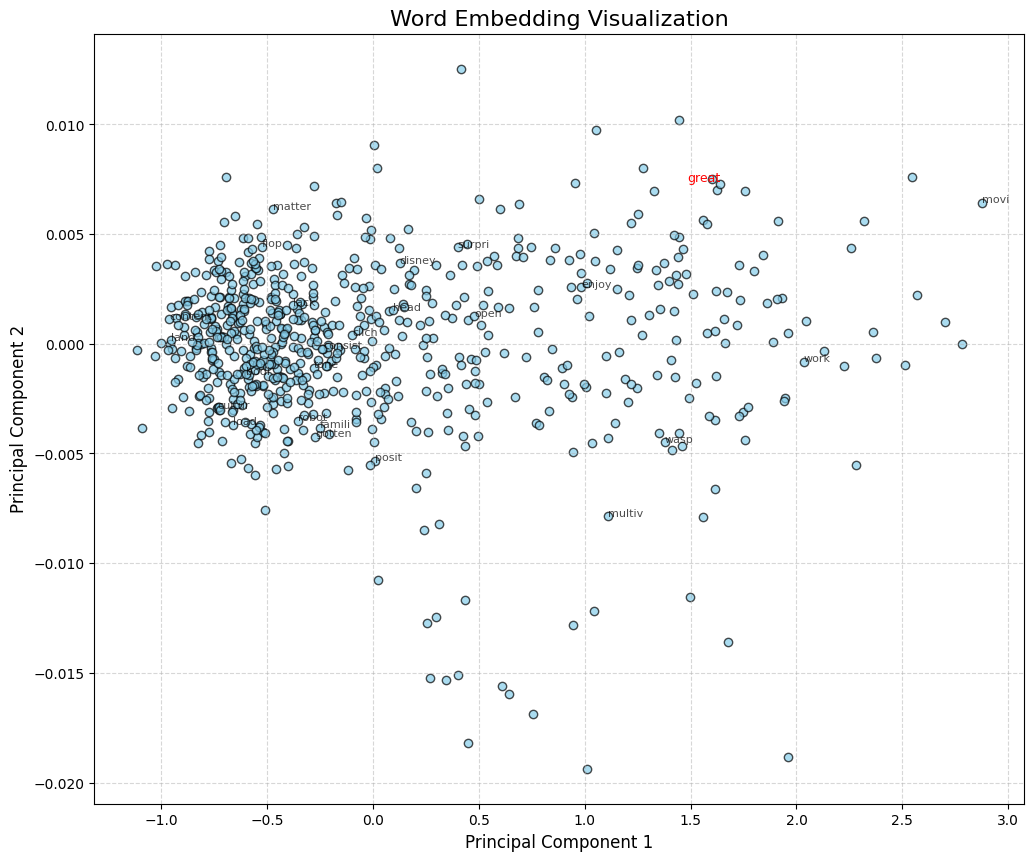

In [15]:
# Creating a scatter plot of the word vectors with visual enhancements
plt.figure(figsize=(12, 10))
plt.scatter(result[:, 0], result[:, 1], color='skyblue', edgecolor='black', alpha=0.7)

# Annotating points with words, emphasizing a subset of words for better visibility
highlighted_words = ['great', 'interesting', 'exciting', 'positive', 'creative', 'Antman']
for i, word in enumerate(words):
    if word in highlighted_words:
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), color='red', fontsize=9, ha='right', va='bottom')
    elif i % 30 == 0:  # Show every 30th word to avoid clutter
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8, alpha=0.7)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a title and labels with a larger font size
plt.title('Word Embedding Visualization', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Showing the plot
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/harshithareddy0306/harshitha_INFO5731_Spring2025/blob/main/sentiment_annotated_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

I learned a lot from this assignment because it allowed me to use a variety of data processing methods. Understanding complicated changes and making sure my results were accurate were two of the biggest obstacles I faced. Putting sentiment analysis into practice and observing how text preprocessing affects classification were two things I really appreciated. Although the time allotted was enough, several parts needed more in-depth investigation, which required more work. It would have been beneficial to have a little more direction or examples of more complex methods.